### Time-Wise Death Analysis: US Data

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('us_data.csv')

In [3]:
df

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2021,5,7,85 years and over,3373.0,3241.0,31.0,397.0,64.0,228.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,2021,7,10,5-14 years,18.0,11.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN
3406,2021,7,10,55-64 years,1204.0,1107.0,17.0,313.0,52.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
3407,2021,7,10,65-74 years,2260.0,2139.0,22.0,651.0,121.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3408,2021,7,10,75-84 years,2484.0,2347.0,16.0,609.0,90.0,154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 36 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Date Of Death Year                                                                                 3410 non-null   int64  
 1   Date Of Death Month                                                                                3410 non-null   int64  
 2   HHSRegion                                                                                          3410 non-null   object 
 3   AgeGroup                                                                                           3410 non-null   object 
 4   AllCause                                                                                           3400 non-null   float

In [5]:
#drop the unrequired columns
df.drop(df.iloc[:, 6:], inplace=True, axis=1)
df

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause
0,2019,1,United States,0-4 years,2022.0,1764.0
1,2021,5,7,85 years and over,3373.0,3241.0
2,2019,1,United States,15-24 years,2340.0,626.0
3,2019,1,United States,25-34 years,4616.0,1623.0
4,2019,1,United States,35-44 years,7023.0,4153.0
...,...,...,...,...,...,...
3405,2021,7,10,5-14 years,18.0,11.0
3406,2021,7,10,55-64 years,1204.0,1107.0
3407,2021,7,10,65-74 years,2260.0,2139.0
3408,2021,7,10,75-84 years,2484.0,2347.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date Of Death Year   3410 non-null   int64  
 1   Date Of Death Month  3410 non-null   int64  
 2   HHSRegion            3410 non-null   object 
 3   AgeGroup             3410 non-null   object 
 4   AllCause             3400 non-null   float64
 5   NaturalCause         3342 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 160.0+ KB


In [7]:
#rename specific columns for easy persual
df.rename(columns={'Date Of Death Year': 'Year', 'Date Of Death Month': 'Month','HHSRegion':'Region'}, inplace=True)

In [8]:
df

,Year,Month,Region,AgeGroup,AllCause,NaturalCause
0,2019,1,United States,0-4 years,2022.0,1764.0
1,2021,5,7,85 years and over,3373.0,3241.0
2,2019,1,United States,15-24 years,2340.0,626.0
3,2019,1,United States,25-34 years,4616.0,1623.0
4,2019,1,United States,35-44 years,7023.0,4153.0
...,...,...,...,...,...,...
3405,2021,7,10,5-14 years,18.0,11.0
3406,2021,7,10,55-64 years,1204.0,1107.0
3407,2021,7,10,65-74 years,2260.0,2139.0
3408,2021,7,10,75-84 years,2484.0,2347.0


In [9]:
#fetch the data for United States Only 
data = df[(df['Region'] == 'United States')]

In [10]:
data

,Year,Month,Region,AgeGroup,AllCause,NaturalCause
0,2019,1,United States,0-4 years,2022.0,1764.0
2,2019,1,United States,15-24 years,2340.0,626.0
3,2019,1,United States,25-34 years,4616.0,1623.0
4,2019,1,United States,35-44 years,7023.0,4153.0
5,2019,1,United States,45-54 years,14399.0,11455.0
...,...,...,...,...,...,...
314,2021,7,United States,5-14 years,453.0,267.0
315,2021,7,United States,55-64 years,31549.0,29670.0
316,2021,7,United States,65-74 years,48319.0,46620.0
317,2021,7,United States,75-84 years,56349.0,54571.0


In [26]:
#Sort the data according to age group 15-24
data1 = data[(data['AgeGroup'] == '15-24 years')]
data1

,Year,Month,Region,AgeGroup,AllCause,NaturalCause
2,2019,1,United States,15-24 years,2340.0,626.0
16,2019,2,United States,15-24 years,2120.0,521.0
29,2019,3,United States,15-24 years,2410.0,554.0
39,2019,4,United States,15-24 years,2353.0,568.0
49,2019,5,United States,15-24 years,2615.0,542.0
59,2019,6,United States,15-24 years,2609.0,581.0
69,2019,7,United States,15-24 years,2673.0,517.0
79,2019,8,United States,15-24 years,2588.0,545.0
89,2019,9,United States,15-24 years,2526.0,520.0
99,2019,10,United States,15-24 years,2595.0,536.0


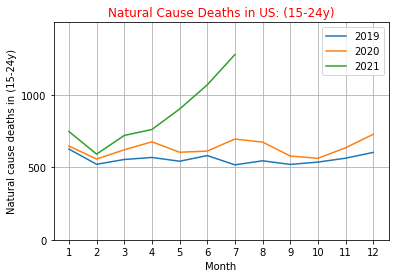

In [27]:
#plot the graph for Natural Cause Deaths (15-24)
plt.title('Natural Cause Deaths in US: (15-24y)',color='r')
plt.xlabel('Month')
plt.xticks(range(1, 13, 1))
plt.ylim(0, 1500)
plt.yticks(np.arange(0, 1500, 500))
plt.ylabel('Natural cause deaths in (15-24y)')
data1.set_index('Month', inplace=True)
data1.groupby('Year')['NaturalCause'].plot(legend=True)
plt.grid()

In [24]:
#Sort the data according to age group 25-34
data2 = data[(data['AgeGroup'] == '25-34 years')]
data2

,Year,Month,Region,AgeGroup,AllCause,NaturalCause
3,2019,1,United States,25-34 years,4616.0,1623.0
17,2019,2,United States,25-34 years,4389.0,1612.0
30,2019,3,United States,25-34 years,4980.0,1694.0
40,2019,4,United States,25-34 years,4768.0,1670.0
50,2019,5,United States,25-34 years,4999.0,1689.0
60,2019,6,United States,25-34 years,5045.0,1623.0
70,2019,7,United States,25-34 years,5277.0,1617.0
80,2019,8,United States,25-34 years,5244.0,1633.0
90,2019,9,United States,25-34 years,4933.0,1491.0
100,2019,10,United States,25-34 years,5064.0,1629.0


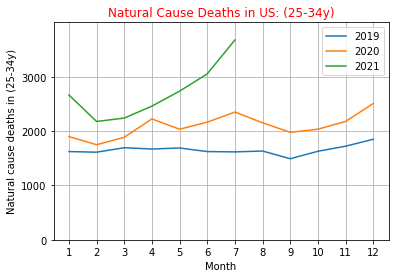

In [25]:
#plot the graph for Natural Cause Deaths (25-34)
plt.title('Natural Cause Deaths in US: (25-34y)',color='r')
plt.xlabel('Month')
plt.xticks(range(1, 13, 1))
plt.ylim(0, 4000)
plt.yticks(np.arange(0, 4000, 1000))
plt.ylabel('Natural cause deaths in (25-34y)')
data2.set_index('Month', inplace=True)
data2.groupby('Year')['NaturalCause'].plot(legend=True)
plt.grid()

In [21]:
#Sort the data according to age group 35-44
data3 = data[(data['AgeGroup'] == '35-44 years')]
data3

,Year,Month,Region,AgeGroup,AllCause,NaturalCause
4,2019,1,United States,35-44 years,7023.0,4153.0
18,2019,2,United States,35-44 years,6207.0,3620.0
31,2019,3,United States,35-44 years,7092.0,4079.0
41,2019,4,United States,35-44 years,6815.0,3870.0
51,2019,5,United States,35-44 years,6963.0,3821.0
61,2019,6,United States,35-44 years,6834.0,3716.0
71,2019,7,United States,35-44 years,7099.0,3834.0
81,2019,8,United States,35-44 years,7193.0,3826.0
91,2019,9,United States,35-44 years,6925.0,3664.0
101,2019,10,United States,35-44 years,7017.0,3851.0


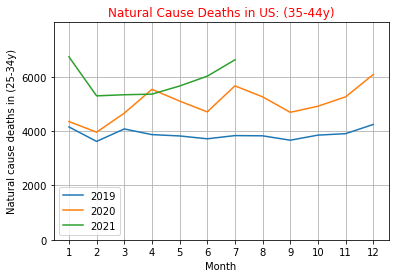

In [22]:
#plot the graph for Natural Cause Deaths (35-44)
plt.title('Natural Cause Deaths in US: (35-44y)',color='r')
plt.xlabel('Month')
plt.xticks(range(1, 13, 1))
plt.ylim(0, 8000)
plt.yticks(np.arange(0, 8000, 2000))
plt.ylabel('Natural cause deaths in (25-34y)')
data3.set_index('Month', inplace=True)
data3.groupby('Year')['NaturalCause'].plot(legend=True)
plt.grid()

### Conclusion : The natural cause of deaths are increasing between the ages 15-44 in 2021